# Basics of Portfolio Analysis:
        - Retruns Dataframe
        - Cumulative Returns 
            - for each asset
            - for portfolio
        - Portfolio Return and Risk
            - Understanding Matrix operation 


### Set up
    - Load Libraries
    - Download data 

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf

In [12]:
df = yf.download(['MSFT','KO','TSLA'],start='2015-01-01')['Adj Close']
df

[*********************100%%**********************]  3 of 3 completed


,KO,MSFT,TSLA
Date,,,
2015-01-02,31.106476,40.305370,14.620667
2015-01-05,31.106476,39.934727,14.006000
2015-01-06,31.342686,39.348595,14.085333
2015-01-07,31.733910,39.848530,14.063333
2015-01-08,32.117764,41.020805,14.041333
...,...,...,...
2024-07-22,64.769997,442.940002,251.509995
2024-07-23,64.959999,444.850006,246.380005
2024-07-24,65.809998,428.899994,215.990005


### Calculating Returns Dataframe and Dropping NaN row

In [13]:
ret_df = df.pct_change()
ret_df

,KO,MSFT,TSLA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,0.000000,-0.009196,-0.042041
2015-01-06,0.007594,-0.014677,0.005664
2015-01-07,0.012482,0.012705,-0.001562
2015-01-08,0.012096,0.029418,-0.001564
...,...,...,...
2024-07-22,-0.007965,0.013338,0.051463
2024-07-23,0.002933,0.004312,-0.020397
2024-07-24,0.013085,-0.035855,-0.123346


In [14]:
ret_df.dropna(inplace=True)
ret_df

### Cumulated Returns for each asset. Another Method where Portfolio comulative return column is added to Returns DF will be shown later

In [15]:
(ret_df + 1).cumprod() - 1

,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009196,-0.042041
2015-01-06,0.007594,-0.023738,-0.036615
2015-01-07,0.020171,-0.011334,-0.038120
2015-01-08,0.032511,0.017750,-0.039624
2015-01-09,0.021120,0.009196,-0.057681
...,...,...,...
2024-07-22,1.082203,9.989603,16.202361
2024-07-23,1.088311,10.036991,15.851488
2024-07-24,1.115637,9.641262,13.772924


<Axes: xlabel='Date'>

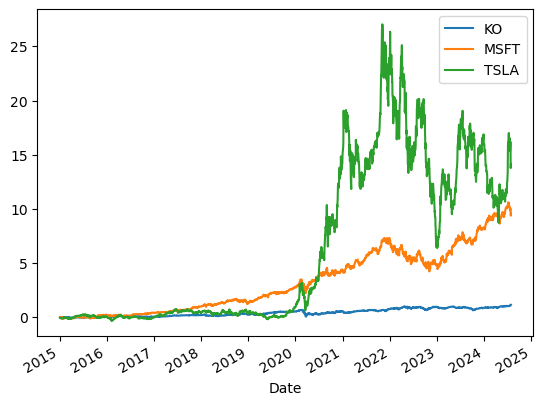

In [16]:
((ret_df + 1).cumprod() - 1).plot()

### Important Metrics about the Returns DF

In [22]:
ret_df.mean(), ret_df.std(), ret_df.cov(), ret_df.corr(), ret_df.mean()/ret_df.std()
#Sharpe ratios of the components is the last one 

(KO      0.000383
 MSFT    0.001130
 TSLA    0.001762
 dtype: float64,
 KO      0.011297
 MSFT    0.017271
 TSLA    0.035584
 dtype: float64,
             KO      MSFT      TSLA
 KO    0.000128  0.000080  0.000070
 MSFT  0.000080  0.000298  0.000248
 TSLA  0.000070  0.000248  0.001266,
             KO      MSFT      TSLA
 KO    1.000000  0.411186  0.174112
 MSFT  0.411186  1.000000  0.403204
 TSLA  0.174112  0.403204  1.000000,
 KO      0.033913
 MSFT    0.065411
 TSLA    0.049509
 dtype: float64)

In [11]:
ret_df.cov()

,KO,MSFT,TSLA
KO,0.000136,0.000090,0.000078
MSFT,0.000090,0.000315,0.000264
TSLA,0.000078,0.000264,0.001284


In [12]:
ret_df.corr()

,KO,MSFT,TSLA
KO,1.000000,0.433855,0.185887
MSFT,0.433855,1.000000,0.414323
TSLA,0.185887,0.414323,1.000000


### Creating the Weights Vector. 
    - Necessary before considering the assets as a portfolio
    - i.e. prior they have been standalone assets. The weights vector gives weighting 
      of each so their individual metrics can now be combined

In [13]:
W = np.ones(len(ret_df.columns))/len(ret_df.columns)
W

In [15]:
pf_exp = W.dot(ret_df.mean())
pf_exp

In [16]:
pf_std = (W.dot(ret_df.cov().dot(W)))**(1/2)
pf_std

In [21]:
pf_exp/pf_std
#sharpe ratio of the portfolio

0.06920656220532359

### Portfolio Cumulative Returns?

In [24]:
#only able to do the mean like this as it is an equal weight portfolio?
ret_df.mean(axis=1)

Date
2015-01-05   -0.017079
2015-01-06   -0.000473
2015-01-07    0.007875
2015-01-08    0.013317
2015-01-09   -0.012746
                ...   
2023-06-09    0.015660
2023-06-12    0.011134
2023-06-13    0.015628
2023-06-14    0.002828
2023-06-15    0.014057
Length: 2127, dtype: float64

In [25]:
(ret_df.mean(axis=1) + 1).cumprod() - 1

Date
2015-01-05   -0.017079
2015-01-06   -0.017544
2015-01-07   -0.009807
2015-01-08    0.003379
2015-01-09   -0.009410
                ...   
2023-06-09    7.569672
2023-06-12    7.665086
2023-06-13    7.800501
2023-06-14    7.825392
2023-06-15    7.949454
Length: 2127, dtype: float64

<AxesSubplot:xlabel='Date'>

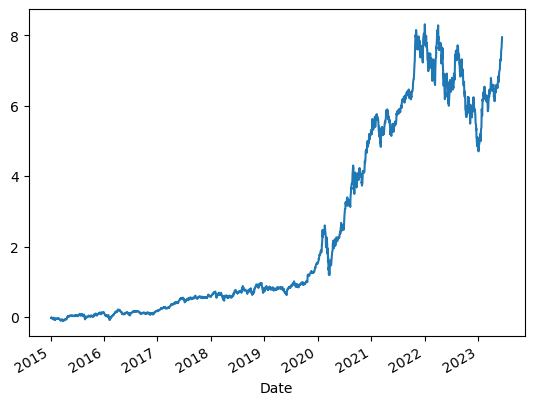

In [26]:
((ret_df.mean(axis=1) + 1).cumprod() - 1).plot()